# <center><b> Model evaluation - Precision

---
## **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Need for Model Evaluation.**](#Section11)
  - **1.2** [**What is Precision Score?**](#Section12)
  - **1.3** [**Concept Behind Precision Score**](#Section13)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)

**6.** [**Data Preparation**](#Section6)<br>

**7.** [**Model Development and Evaluation.**](#Section7)<br>
  - **7.1** [**Random Forest Baseline Model**](#Section71)<br>
  - **7.2** [**Using Trained Model for Prediction**](#Section72)<br>
  - **7.3** [**Random Forest Baseline Model Evaluation**](#Section73)<br>
  - **7.4** [**Random Forest with RandomizedSearchCV**](#Section74)<br>
  - **7.5** [**Random Forest with RandomSearchCV Model Evaluation**](#Section75)<br>
  
**8.** [**Conclusion**](#Section8)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

- **Model Evaluation** is an **integral part of the model development process**.

- It **helps to find** **the best model that represents our data** and how well the chosen model will work in the future.

- Evaluating model performance with the data used for training should not be used in data science because the model has already learned the features passed for training and when evaluated on the same data it will pass overfitted result.

<a name = Section11></a>
### **1.1 Need for Model Evaluation.**

- Model Evaluation **plays an important role** in the whole process.

- The performance of a model is **calculated by choosing the right metrics**.

- The **right metrics** are generally **specific to the use case**.

- It also helps us choose the right model.

<a name = Section12></a>
### **1.2 What is Precision Score?**

 Precision is the **the proportion of positive cases that were correctly identified**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/precision.jpg" width="480" height="100" /></center></br>

Precision is defined as **the number of true positives divided by the number of true positives plus the number of false positives**.

<a name = Section13></a>
### **1.3 Concept Behind Precision Score**

- As we know, **Precision gives the proportion of positive cases that were correctly identified**.

- Let us understand it with the **confusion matrix**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/confusion%20total%20matrix.png" width="480" height="240" /></center>

- In the above diagram,

  - **True Positives (TP) -**

    - These are the **correctly predicted positive values** which means that the value of **actual class is yes** and the value of **predicted class is also yes**.
  
  - **True Negatives (TN) -**
  
     - These are the **correctly predicted negative values** which means that the value of **actual class is no** and value of **predicted class is also no**.

  - **False Positives (FP) –**
     - When **actual class is no** and **predicted class is yes**.

  - **False Negatives (FN) –**
     - When **actual class is yes** but **predicted class in no**.  



---
<a name = Section1></a>
# **2. Problem Statement**
---

**Diabetes mellitus** is a series of metabolic disorders where there is hyperglycemia (i.e., high blood glucose levels) which can be broadly divided into **type 1 diabetes** (patients cannot produce insulin, mainly affecting juveniles), **type 2 diabetes** (patients have insulin resistance) and gestational diabetes (female patients who **while pregnant** can be **less susceptive to insulin**). **Type 2 diabetes is the most prevalent form of diabetes**.

This data set contains information on Native American women from the United States. It has **8 medical diagnostic attributes** and **one target variable (i.e, Outcome)** of **768 female patients** with 34.9% having diabetes (268 patients). The variance for insulin for both categories was quite high. An independent t-test was used to compare the values between diabetic and non-diabetic patients showing that differences occurred for all 8 independent variables.

For example, there is evidence to suggest that the average blood glucose concentration for diabetics mean=142.2 mg/dl (95% CI: 138.6, 145.7) was higher than non-diabetics, mean=110.7 mg/dl (95% CI: 108.5, 112.9); t(766)= 15.67, p < 0.001 at the 95% confidence level.

Our aim is to find out if the patient is **diabetic(1) or not(0) diabetic** using Logistic Regression.

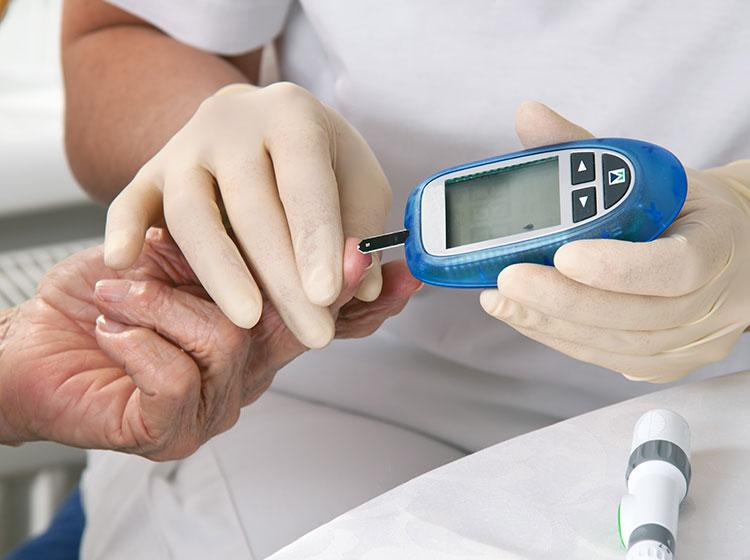

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q ydata-profiling               # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.8 MB/s eta 0:00:00


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade ydata-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import ydata Profiling (To generate Univariate Analysis)                       ]
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay                   # To plot confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of __768 rows__.<br/>
Below is a table having brief description of features present in the dataset.



|Feature    |	Description                                               |
|-----------| ------------                                                |
| Pregnancies   | 	number of times the individual has been pregnant.                                       |
| Glucose  | 	glucose concentration, measured in milligrams per deciliter (mg/dL)              |
| BloodPressure	| blood pressure in millimeters of mercury (mmHg)                 |
| SkinThickness	| thickness of the skinfold in millimeters                                       |
| Insulin	|  2-hour serum insulin level microinternational units per milliliter (μU/ml)                  |   
| BMI  |   Body Mass Index  kg/m^2                           |
| DiabetesPedigreeFunction  | 	provides information about the diabetes history in relatives and the genetic relationship of the individual to those relatives       |
| Age  | 	age of the individual in years                           |                          |
| Outcome   | value of 1 typically indicates that the person has diabetes, while a value of 0 indicates the absence of diabetes.                                       |                                

In [2]:
diabetes = pd.read_csv('diabetes_1.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [3]:
print(f"Shape of our Data is: {diabetes.shape}")
print(f"Number of Rows are: {diabetes.shape[0]}")
print(f"Number of Columns are: {diabetes.shape[1]}")

Shape of our Data is: (768, 9)
Number of Rows are: 768
Number of Columns are: 9


In [4]:
diabetes.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations:**

- There are **no null values present**.

- **Each feature** seems to have **correct data type**.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000
mean,3.84505,120.89453,69.10547,20.53646,79.79948,31.99258,0.47188,33.24089,0.34896
std,3.36958,31.97262,19.35581,15.95222,115.24400,7.88416,0.33133,11.76023,0.47695
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.07800,21.00000,0.00000
25%,1.00000,99.00000,62.00000,0.00000,0.00000,27.30000,0.24375,24.00000,0.00000
50%,3.00000,117.00000,72.00000,23.00000,30.50000,32.00000,0.37250,29.00000,0.00000
75%,6.00000,140.25000,80.00000,32.00000,127.25000,36.60000,0.62625,41.00000,1.00000
max,17.00000,199.00000,122.00000,99.00000,846.00000,67.10000,2.42000,81.00000,1.00000


**Observations:**

- The **mean glucose level** in the dataset is approximately 120.89 mg/dL, with a standard deviation of 31.97 mg/dL

- The mean body mass index (BMI) in the dataset is approximately **31.99 kg/m^2**

- The **Diabetes Pedigree** function values range from 0.08 to 2.42, with 25% of the values falling below 0.24.

<a name = Section5></a>
---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**
- For **quick analysis** ydata profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df = crime)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')


Accomplished!


In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a name = Section6></a>

---
# **6. Data Preparation**
---

**Preparing x and y using pandas**

In [6]:
x = diabetes.drop('Outcome',axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.60000,0.62700,50
1,1,85,66,29,0,26.60000,0.35100,31
2,8,183,64,0,0,23.30000,0.67200,32
3,1,89,66,23,94,28.10000,0.16700,21
4,0,137,40,35,168,43.10000,2.28800,33


In [7]:
y = diabetes['Outcome']

**Spliting X and y into train and test dataset.**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

**Checking the shape of X and y of train dataset**

In [9]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")

X_train Shape: (576, 8)
y_train Shape: (576,)


**Checking the shape of X and y of test dataset**

In [10]:
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_test Shape: (192, 8)
y_test Shape: (192,)


<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will **develop RandomForest using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Precision score**, Also we will check for **Accuracy**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Curve**.



<a name = Section71></a>

## **7.1 Logistic Regression**

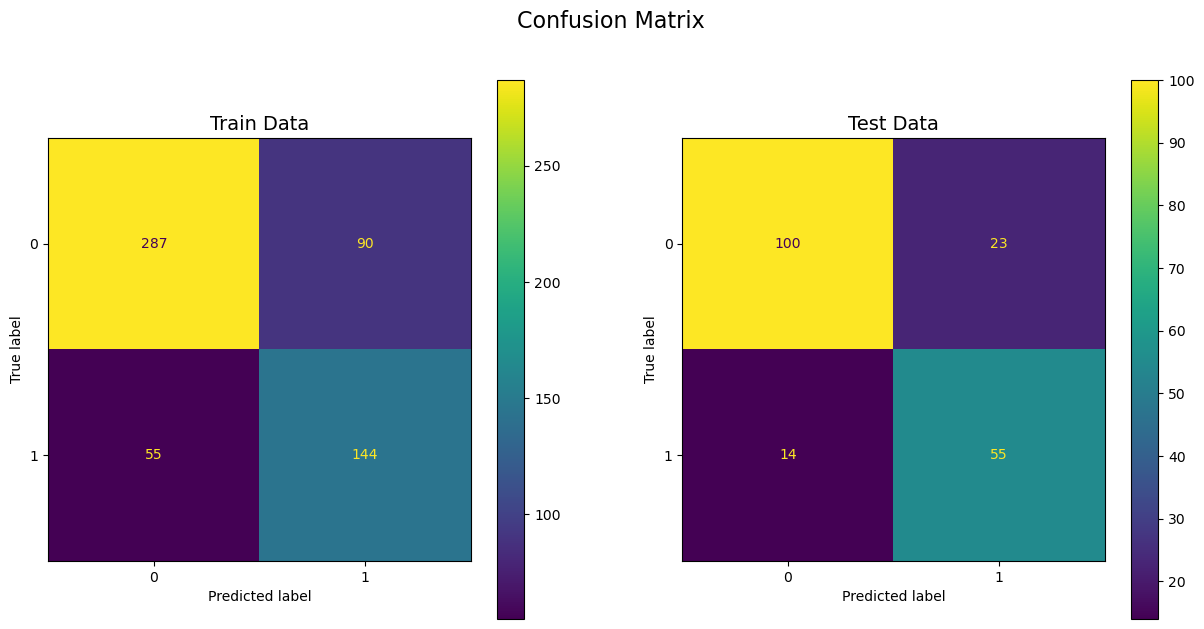

In [11]:
# Instantiate a Logistic Regression classifier
logi = LogisticRegression(random_state=42, class_weight='balanced')
logi.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = logi.predict(X_train)
y_test_pred_count = logi.predict(X_test)

#Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
ConfusionMatrixDisplay.from_estimator(logi, X_train, y_train,values_format='.5g',cmap='viridis', ax=ax1)
ConfusionMatrixDisplay.from_estimator(logi, X_test, y_test,values_format='.5g',cmap='viridis', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(False)
ax2.grid(False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

<a name = Section73></a>

## **7.3 Logistic Model Evaluation**

In [12]:
print(f"Precision Score = {precision_score(y_test, y_test_pred_count)}")

Precision Score = 0.7051282051282052


In [13]:
print(f"Recall Score = {recall_score(y_test, y_test_pred_count)}")

Recall Score = 0.7971014492753623


### **Checking F1-Score**

- The F measure (F1 score or F score) is a **measure of a test’s accuracy** and is defined as **the weighted harmonic mean of the precision and recall of the test**.
- The F score can **provide a more realistic measure of a test’s performance** by **using both precision and recall**.
- The F score is often **used in information retrieval** for measuring search, **document classification**, and **query classification performance**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/f1.jpg" width="300" height="240" /></center>


In [14]:
print(f"F1 Score = {f1_score(y_test, y_test_pred_count)}")

F1 Score = 0.7482993197278911


### **Checking ROC-AUC Curve and Precision-Recall Curve**

- ROC curve should not be used for **imbalanced data** as that can **interpret wrong result**. *If the model is performing good on the imbalanced data we should use precision-recall curve*.

- Because the **False Positive Rate ( False Positives / False Positives + True Negatives )** does **not drop drastically when the Total Real Negatives is huge**.

- Whereas **Precision ( True Positives / (True Positives + False Positives) )** is **highly sensitive to False Positives and is not impacted by a large total real negative**.

In [15]:
y_pred_test = logi.predict(X_test)

Text(0.5, 0, 'Recall')

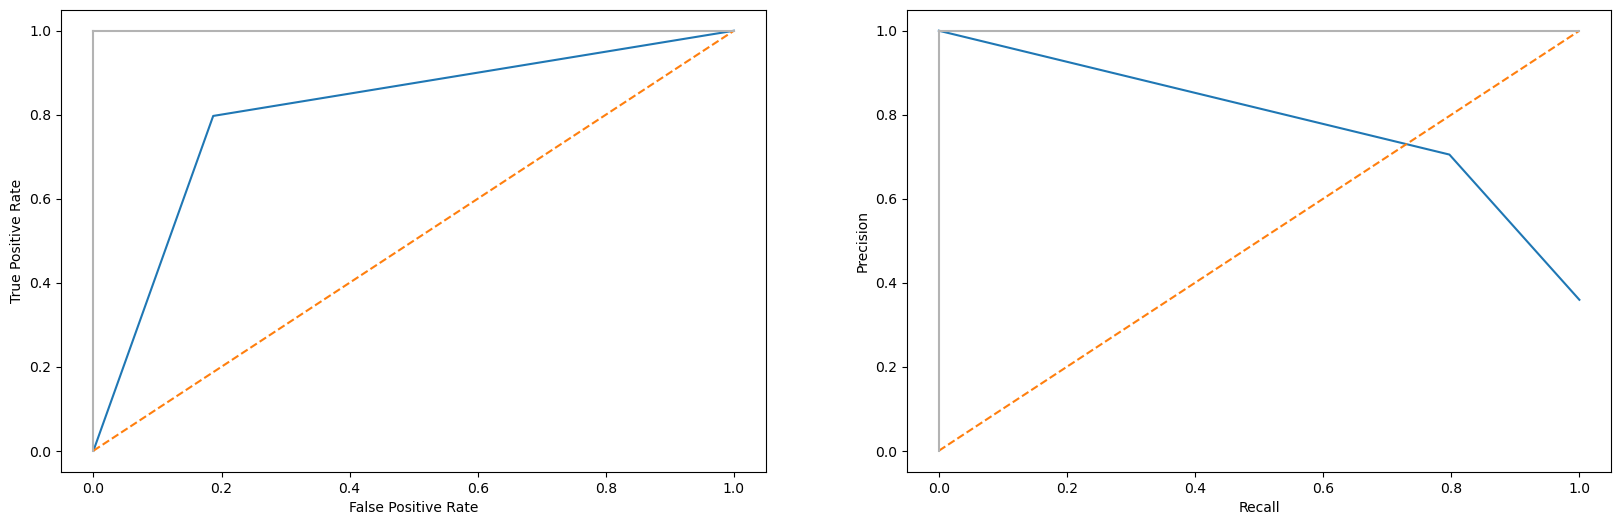

In [16]:
fpr_log, tpr_log, thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

In [17]:
print(f"Area Under ROC curve score = {roc_auc_score(y_test, y_test_pred_count)}")

Area Under ROC curve score = 0.8050547896783316


**Observation:**

- We can **observe** a slight difference between **ROC-AUC CURVE** and **Precision-Recall Curve**.

# **Random Forest**

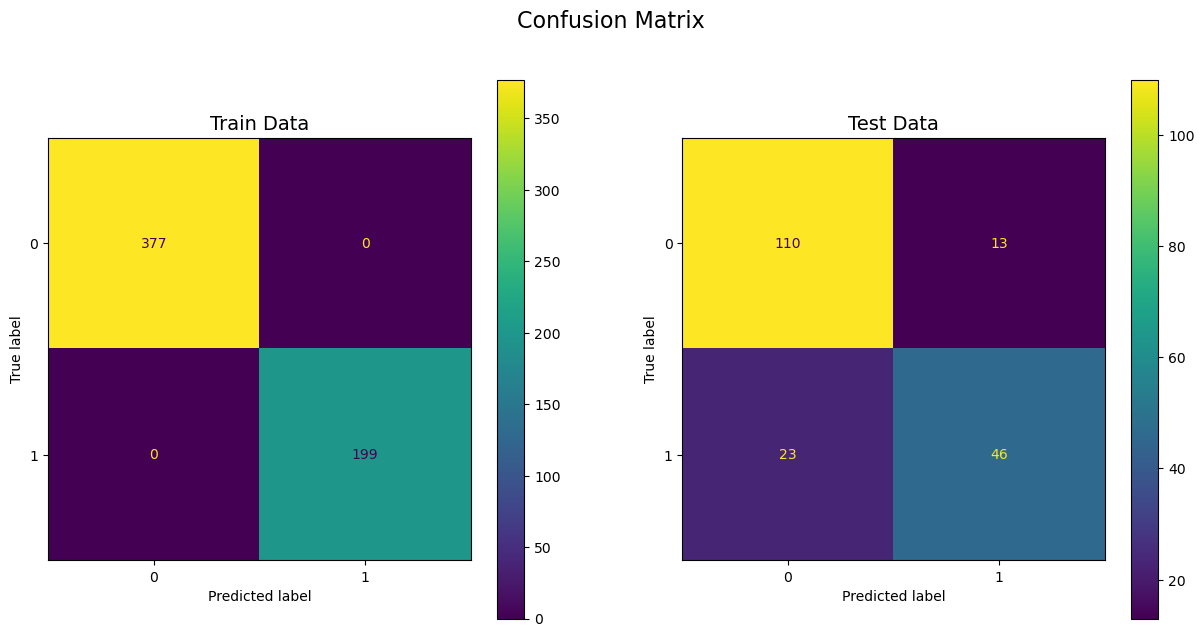

In [18]:
# Instantiate a Logistic Regression classifier
RF = RandomForestClassifier(random_state=41, class_weight='balanced')
RF.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count1 = RF.predict(X_train)
y_test_pred_count1 = RF.predict(X_test)

#Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
ConfusionMatrixDisplay.from_estimator(RF, X_train, y_train,values_format='.5g',cmap='viridis', ax=ax1)
ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test,values_format='.5g',cmap='viridis', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(False)
ax2.grid(False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

<a name = Section75></a>

## **7.5 Random Forest with RandomSearchCV Model Evaluation**

### **Checking Accuracy**

In [19]:
print(f"Accuracy score for test data is: {accuracy_score(y_test, y_test_pred_count1)}")

Accuracy score for test data is: 0.8125


### **Checking Precision Score**

In [20]:
print(f"Precision score for test data is: {precision_score(y_test, y_test_pred_count1)}")

Precision score for test data is: 0.7796610169491526


### **Checking Recall Score**

In [21]:
print(f"Recall score for test data is: {recall_score(y_test, y_test_pred_count1)}")

Recall score for test data is: 0.6666666666666666


### **Checking F1-Score**


In [22]:
print(f"F1 score for test data is: {f1_score(y_test, y_test_pred_count1)}")

F1 score for test data is: 0.71875


### **Checking ROC-AUC Curve and Precision-Recall Curve**

Text(0.5, 0, 'Recall')

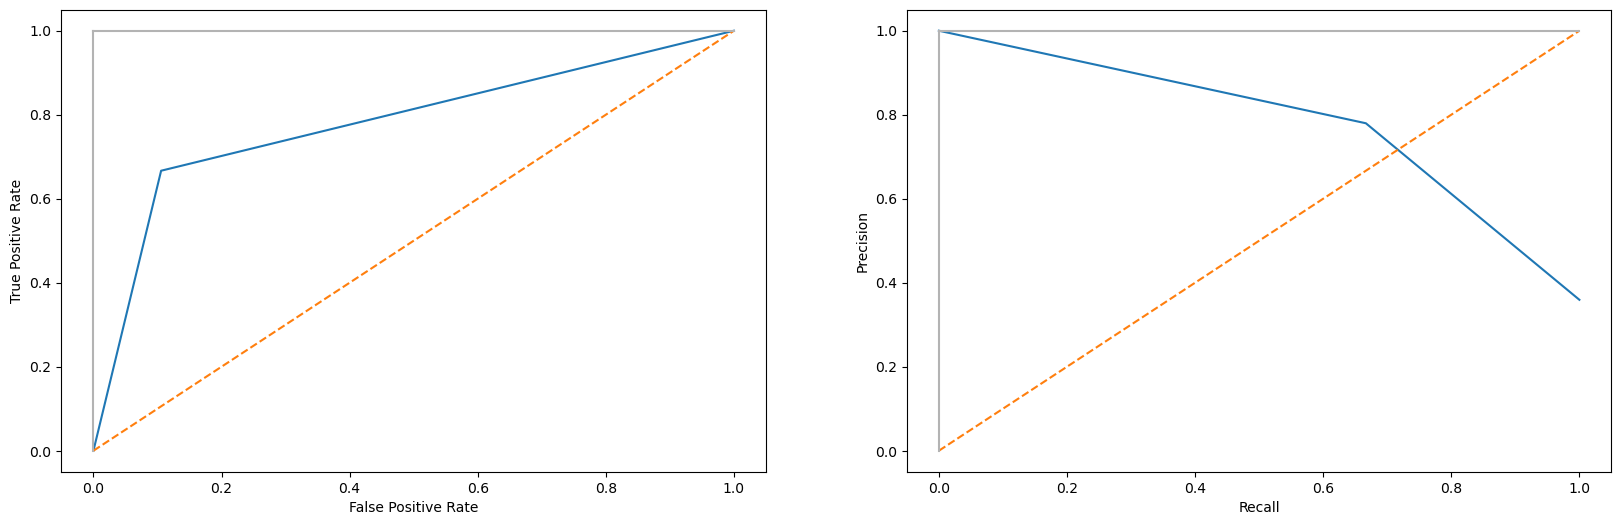

In [23]:
fpr_log, tpr_log, thres_log = roc_curve(y_test, y_test_pred_count1)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_test_pred_count1)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

In [24]:
print(f"Area under ROC curver is: {roc_auc_score(y_test, y_test_pred_count1)}")

Area under ROC curver is: 0.7804878048780487


<a name = Section7></a>

---
# **7. Choosing Better Model Based On Prediction**
---

In [25]:
roc_auc_dict = {'Logistic Regression Model':roc_auc_score(y_test, y_test_pred_count),
                  'Random Forest Model':roc_auc_score(y_test, y_test_pred_count1)}

In [26]:
roc_auc = pd.DataFrame(roc_auc_dict, index=['Scores'])

In [27]:
roc_auc

,Logistic Regression Model,Random Forest Model
Scores,0.80505,0.78049


- We have **compared the performance** of the two models using **various model evaluation techinques**.

- ROC_AUC_score is a good **choice** because it allows you to see how well the model is able to distinguish between **positive** (diabetes) and **negative** (no diabetes) instances. This is important because misclassifying a patient who actually has diabetes could have serious consequences, so we will give importance to ROC_AUC_score.
  
  - **ROC_AUC_score for Logistic Regression Model is: 0.80**

  - **ROC_AUC_score for Random Forest Model is: 0.78**

* As **ROC_AUC_score of Logistic Regression  Model is greater** than that of Random Forest Model which is rare, therefore, **Logistic Regression Model** is preferable.

<a name = Section8></a>

---
# **8. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** the diabetic patient.